##Carregando os dados

In [41]:
from google.colab import drive
drive.mount('/content/drive')

# importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# importando o arquivo
df = pd.read_csv('/content/drive/My Drive/Datasets/content/processed/dados_processados.csv', sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,curtidas_dia,comentarios_dia,tempo_tela,frequencia_acesso,nivel_vicio
0,-0.910271,-1.394776,-1.301831,1.057720,nao_viciado
1,0.453175,-1.124504,-1.301831,-1.314475,nao_viciado
2,0.248658,1.544440,1.288877,-1.174934,moderado
3,-1.506778,0.530917,-0.006477,-1.454016,moderado
4,-1.114787,1.139031,1.288877,1.057720,viciado


##Informações

In [42]:
# Dimensão
print(df.shape)

(600, 5)


In [43]:
# Exibe com arredondamento mais amigável
df_describe = df.describe().round(4)

print("Resumo Estatístico (dados normalizados):")
display(df_describe)

Resumo Estatístico (dados normalizados):


,curtidas_dia,comentarios_dia,tempo_tela,frequencia_acesso
count,600.0000,600.0000,600.0000,600.0000
mean,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.7283,-1.7664,-1.3018,-1.8029
25%,-0.8932,-0.8542,-1.3018,-0.8261
50%,0.0271,-0.0265,-0.0065,0.0112
75%,0.8452,0.8688,1.2889,0.9182
max,1.6803,1.6120,1.2889,1.6159


In [44]:
# Distribuição de classe
print(df.groupby('nivel_vicio').size())

nivel_vicio
moderado       390
nao_viciado    114
viciado         96
dtype: int64


##Visualização dos dados

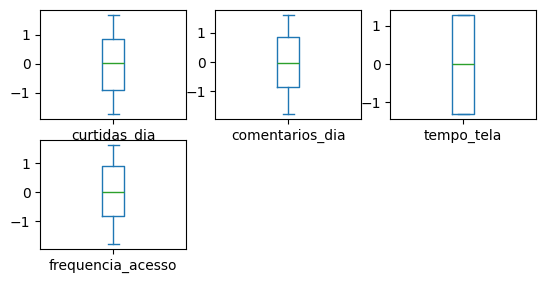

In [45]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

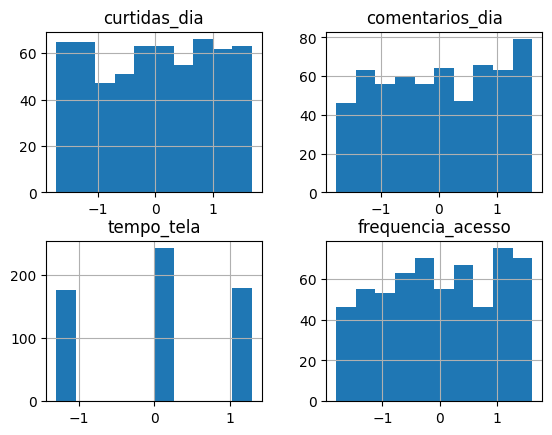

In [46]:
# histograma
df.hist()
plt.show()

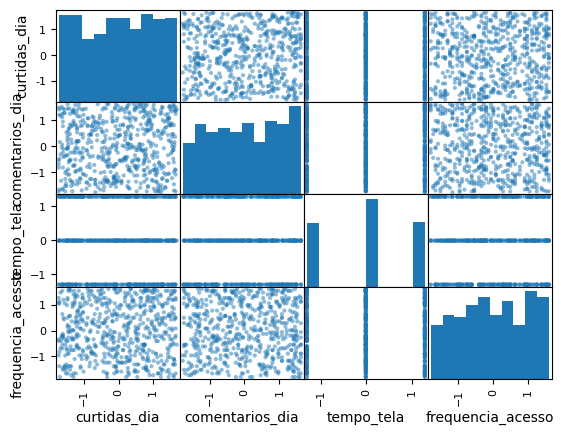

In [47]:
# gráfico de dispersão
scatter_matrix(df)
plt.show()

##Criar conjunto de validação

In [48]:
# Conjunto de Validação
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.251
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)


(449, 4)
(449,)
(151, 4)
(151,)


In [49]:
# Métricas
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [50]:
# Algoritmos
models = []
models.append(('LR', OneVsRestClassifier(LogisticRegression(solver='liblinear'))))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação de cada modelo
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)


LR: 0.872727 (0.061905)
LDA: 0.888586 (0.057215)
KNN: 0.892980 (0.044623)
CART: 0.879848 (0.042209)
NB: 0.812727 (0.065331)
SVM: 0.888485 (0.057573)


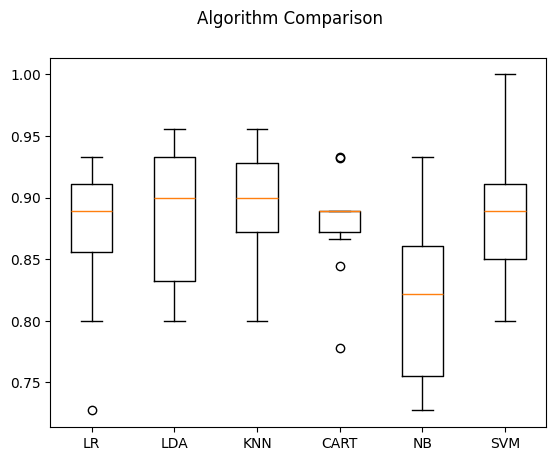

In [51]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## KNN

In [52]:
# Precisão do modelo no conjunto de treinamento
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.9376391982182628
[[271   5   8]
 [  7  79   0]
 [  8   0  71]]
              precision    recall  f1-score   support

    moderado       0.95      0.95      0.95       284
 nao_viciado       0.94      0.92      0.93        86
     viciado       0.90      0.90      0.90        79

    accuracy                           0.94       449
   macro avg       0.93      0.92      0.93       449
weighted avg       0.94      0.94      0.94       449



In [53]:
# Precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8940397350993378
[[100   3   3]
 [  6  22   0]
 [  4   0  13]]
              precision    recall  f1-score   support

    moderado       0.91      0.94      0.93       106
 nao_viciado       0.88      0.79      0.83        28
     viciado       0.81      0.76      0.79        17

    accuracy                           0.89       151
   macro avg       0.87      0.83      0.85       151
weighted avg       0.89      0.89      0.89       151



## LDA

In [54]:
# Precisão do modelo no conjunto de treinamento
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.89086859688196
[[258  14  12]
 [ 11  75   0]
 [ 12   0  67]]
              precision    recall  f1-score   support

    moderado       0.92      0.91      0.91       284
 nao_viciado       0.84      0.87      0.86        86
     viciado       0.85      0.85      0.85        79

    accuracy                           0.89       449
   macro avg       0.87      0.88      0.87       449
weighted avg       0.89      0.89      0.89       449



In [55]:
# Precisão do modelo no conjunto de validação
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8741721854304636
[[96  4  6]
 [ 6 22  0]
 [ 3  0 14]]
              precision    recall  f1-score   support

    moderado       0.91      0.91      0.91       106
 nao_viciado       0.85      0.79      0.81        28
     viciado       0.70      0.82      0.76        17

    accuracy                           0.87       151
   macro avg       0.82      0.84      0.83       151
weighted avg       0.88      0.87      0.88       151



## LR

In [56]:
# Precisão do modelo no conjunto de treinamento
lr = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
lr.fit(X_train, Y_train)
predictions = lr.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.8775055679287305
[[273   4   7]
 [ 22  64   0]
 [ 22   0  57]]
              precision    recall  f1-score   support

    moderado       0.86      0.96      0.91       284
 nao_viciado       0.94      0.74      0.83        86
     viciado       0.89      0.72      0.80        79

    accuracy                           0.88       449
   macro avg       0.90      0.81      0.85       449
weighted avg       0.88      0.88      0.87       449



In [57]:
# Precisão do modelo no conjunto de validação
lr = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8675496688741722
[[101   2   3]
 [  8  20   0]
 [  7   0  10]]
              precision    recall  f1-score   support

    moderado       0.87      0.95      0.91       106
 nao_viciado       0.91      0.71      0.80        28
     viciado       0.77      0.59      0.67        17

    accuracy                           0.87       151
   macro avg       0.85      0.75      0.79       151
weighted avg       0.87      0.87      0.86       151



## CART

In [58]:
# Precisão do modelo no conjunto de treinamento
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

1.0
[[284   0   0]
 [  0  86   0]
 [  0   0  79]]
              precision    recall  f1-score   support

    moderado       1.00      1.00      1.00       284
 nao_viciado       1.00      1.00      1.00        86
     viciado       1.00      1.00      1.00        79

    accuracy                           1.00       449
   macro avg       1.00      1.00      1.00       449
weighted avg       1.00      1.00      1.00       449



In [59]:
# Precisão do modelo no conjunto de validação
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.847682119205298
[[93  7  6]
 [ 7 21  0]
 [ 3  0 14]]
              precision    recall  f1-score   support

    moderado       0.90      0.88      0.89       106
 nao_viciado       0.75      0.75      0.75        28
     viciado       0.70      0.82      0.76        17

    accuracy                           0.85       151
   macro avg       0.78      0.82      0.80       151
weighted avg       0.85      0.85      0.85       151



## NB

In [60]:
# Precisão do modelo no conjunto de treinamento
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.8195991091314031
[[280   1   3]
 [ 47  39   0]
 [ 30   0  49]]
              precision    recall  f1-score   support

    moderado       0.78      0.99      0.87       284
 nao_viciado       0.97      0.45      0.62        86
     viciado       0.94      0.62      0.75        79

    accuracy                           0.82       449
   macro avg       0.90      0.69      0.75       449
weighted avg       0.85      0.82      0.80       449



In [61]:
# Precisão do modelo no conjunto de validação
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8145695364238411
[[103   1   2]
 [ 14  14   0]
 [ 11   0   6]]
              precision    recall  f1-score   support

    moderado       0.80      0.97      0.88       106
 nao_viciado       0.93      0.50      0.65        28
     viciado       0.75      0.35      0.48        17

    accuracy                           0.81       151
   macro avg       0.83      0.61      0.67       151
weighted avg       0.82      0.81      0.79       151



## SVM

In [62]:
# Precisão do modelo no conjunto de treinamento
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.9064587973273942
[[269   6   9]
 [ 11  75   0]
 [ 16   0  63]]
              precision    recall  f1-score   support

    moderado       0.91      0.95      0.93       284
 nao_viciado       0.93      0.87      0.90        86
     viciado       0.88      0.80      0.83        79

    accuracy                           0.91       449
   macro avg       0.90      0.87      0.89       449
weighted avg       0.91      0.91      0.91       449



In [63]:
# Precisão do modelo no conjunto de validação
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8741721854304636
[[98  4  4]
 [ 6 22  0]
 [ 5  0 12]]
              precision    recall  f1-score   support

    moderado       0.90      0.92      0.91       106
 nao_viciado       0.85      0.79      0.81        28
     viciado       0.75      0.71      0.73        17

    accuracy                           0.87       151
   macro avg       0.83      0.81      0.82       151
weighted avg       0.87      0.87      0.87       151



##Fazer treinamento e validação de todos os algoritmos.

In [64]:
nova_tabela = pd.read_csv("/content/drive/My Drive/Datasets/content/processed/dataset_interacoes.csv", sep='|')
display(nova_tabela)

print(nova_tabela)


array = nova_tabela.values
novos = array[:,0:4]

print(novos)

,curtidas_dia,comentarios_dia,tempo_tela,frequencia_acesso
0,288,187,1,44
1,169,138,2,28
2,273,44,3,34
3,282,121,3,37
4,226,125,2,4
...,...,...,...,...
2995,416,112,1,39
2996,48,77,3,50
2997,116,36,1,10
2998,396,68,2,33


      curtidas_dia  comentarios_dia  tempo_tela  frequencia_acesso
0              288              187           1                 44
1              169              138           2                 28
2              273               44           3                 34
3              282              121           3                 37
4              226              125           2                  4
...            ...              ...         ...                ...
2995           416              112           1                 39
2996            48               77           3                 50
2997           116               36           1                 10
2998           396               68           2                 33
2999           156              109           2                 44

[3000 rows x 4 columns]
[[288 187   1  44]
 [169 138   2  28]
 [273  44   3  34]
 ...
 [116  36   1  10]
 [396  68   2  33]
 [156 109   2  44]]


In [65]:
previsao = lda.predict(novos)
print(previsao)


['viciado' 'viciado' 'viciado' ... 'viciado' 'viciado' 'viciado']


## Salvar o Treinamento

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import joblib

best_model = OneVsRestClassifier(LinearDiscriminantAnalysis())
best_model.fit(X_train, Y_train)

joblib.dump(best_model, "/content/drive/My Drive/Datasets/models/modelo.pkl")

['/content/drive/My Drive/Datasets/models/modelo.pkl']

## Converter em ONNX

In [67]:
!pip install skl2onnx onnx onnxruntime

In [68]:
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt
import numpy as np

In [69]:
import os

modelo_path = "/content/drive/My Drive/Datasets/models/modelo.pkl"

# tamanho do arquivo
print("Tamanho do arquivo (bytes):", os.path.getsize(modelo_path))

# primeiras linhas do arquivo (em modo texto)
with open(modelo_path, "rb") as f:
    content = f.read(50)

print(content)


Tamanho do arquivo (bytes): 3311
b'\x80\x04\x95\x9f\x02\x00\x00\x00\x00\x00\x00\x8c\x12sklearn.multiclass\x94\x8c\x13OneVsRestClassif'


In [71]:
modelo_path = "/content/drive/My Drive/Datasets/models/modelo.pkl"

modelo = joblib.load(modelo_path)

print("Modelo carregado:", type(modelo))

Modelo carregado: <class 'sklearn.multiclass.OneVsRestClassifier'>


In [72]:
input_type = [('input', FloatTensorType([None, 4]))]
onnx_model = convert_sklearn(modelo, initial_types=input_type)

onnx_path = "/content/drive/My Drive/Datasets/models/modelo.onnx"

with open(onnx_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Modelo ONNX salvo em:", onnx_path)

Modelo ONNX salvo em: /content/drive/My Drive/Datasets/models/modelo.onnx


In [73]:
sess = rt.InferenceSession(onnx_path)

input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

# exemplo de entrada (substitua pelos seus valores)
entrada = np.array([[20, 10, 2, 50]], dtype=np.float32)

resultado = sess.run([output_name], {input_name: entrada})
print("Predição ONNX:", resultado)

Predição ONNX: [array(['viciado'], dtype=object)]
